# 01_Visualize_Feature_Density
this notebook serves as an exploratory analysis of the seal sleep features for Wednesday

### Prerequisites:
- `make features` (this will run `make download` if you have not already downloaded the input files)

In [1]:
import pandas as pd
import pytz

In [2]:
import sys
sys.path.insert(0, '..')
import src.visualization.visualize as viz

In [3]:
%load_ext autoreload
%autoreload 2

## Load features dataframe

In [4]:
# PST Timezone
pst_timezone = pytz.timezone('America/Los_Angeles')

# Read features and set index as datetimeindex
features_df = pd.read_csv('../data/processed/features/test12_Wednesday_07_features_with_labels.csv',
                          index_col=0)
features_df.index = pd.DatetimeIndex(features_df.index, tz=pst_timezone)

/var/folders/by/vpz_wqc14_vgx3vzwgf90gw00000gn/T/ipykernel_35355/1602631621.py:5: DtypeWarning: Columns (58) have mixed types. Specify dtype option on import or set low_memory=False.
  features_df = pd.read_csv('../data/processed/features/test12_Wednesday_07_features_with_labels.csv',


---
Drop NA values

---

In [5]:
features_df = features_df.dropna()

In [6]:
features_df.columns

Index(['Heart Rate', 'Pressure Mean', 'Pressure Std.Dev', 'ODBA Mean',
       'ODBA Std.Dev', 'GyrZ Mean', 'GyrZ Std.Dev', 'yasa_eeg_std',
       'yasa_eeg_iqr', 'yasa_eeg_skew', 'yasa_eeg_kurt', 'yasa_eeg_nzc',
       'yasa_eeg_hmob', 'yasa_eeg_hcomp', 'yasa_eeg_sdelta', 'yasa_eeg_fdelta',
       'yasa_eeg_theta', 'yasa_eeg_alpha', 'yasa_eeg_sigma', 'yasa_eeg_beta',
       'yasa_eeg_dt', 'yasa_eeg_ds', 'yasa_eeg_db', 'yasa_eeg_at',
       'yasa_eeg_abspow', 'yasa_eeg_sdelta_std', 'yasa_eeg_fdelta_std',
       'yasa_eeg_theta_std', 'yasa_eeg_alpha_std', 'yasa_eeg_sigma_std',
       'yasa_eeg_beta_std', 'yasa_eeg_sdelta_relative',
       'yasa_eeg_fdelta_relative', 'yasa_eeg_theta_relative',
       'yasa_eeg_alpha_relative', 'yasa_eeg_sigma_relative',
       'yasa_eeg_beta_relative', 'yasa_eeg_perm', 'yasa_eeg_higuchi',
       'yasa_eeg_petrosian', 'yasa_heartrate_mean', 'yasa_heartrate_std',
       'yasa_heartrate_iqr', 'yasa_heartrate_skew', 'yasa_heartrate_kurt',
       'yasa_heartra

## Plot EEG Features 

#### Delta power

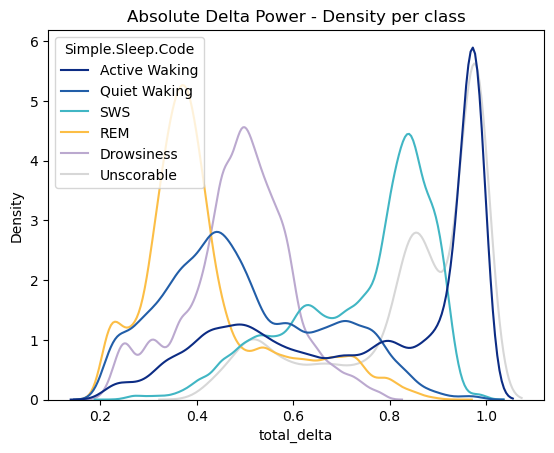

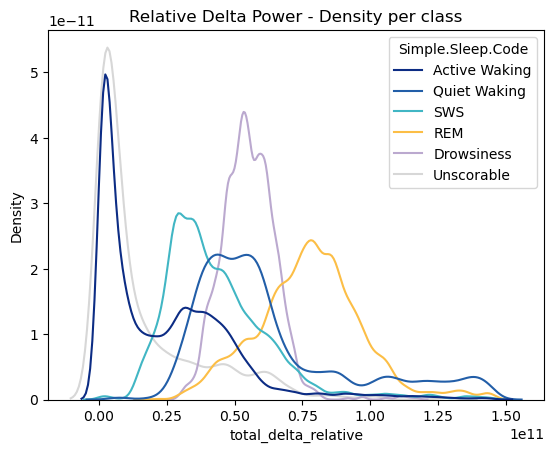

In [7]:
features_df['total_delta'] = (
    features_df['yasa_eeg_sdelta'] + features_df['yasa_eeg_fdelta']
)
features_df['total_delta_relative'] = (
    features_df['yasa_eeg_sdelta_relative'] + features_df['yasa_eeg_fdelta_relative']
)
ax = viz.plot_feature_density(features_df, 'total_delta', 'Simple.Sleep.Code',
                              'Absolute Delta Power - Density per class')

ax = viz.plot_feature_density(features_df, 'total_delta_relative', 'Simple.Sleep.Code',
                              'Relative Delta Power - Density per class')

➥ Delta power has a high absolute power during SWS while maintaining a decently high relative delta power (relative to the 0.4-30Hz power)
<br>➥ During Active Waking, absolute delta power is high but this is an artifact of EEG noise which is reflected in the low relative delta power
<br>➥ During Drowsiness, absolute delta power is higher than REM but not as high as SWS, but the relative delta power is higher than SWS
<br>➥ During REM, absolute delta power is low but the relative delta power is high (EEG activity is low, but delta power makes up a large portion of all EEG activity during REM

#### EEG STD

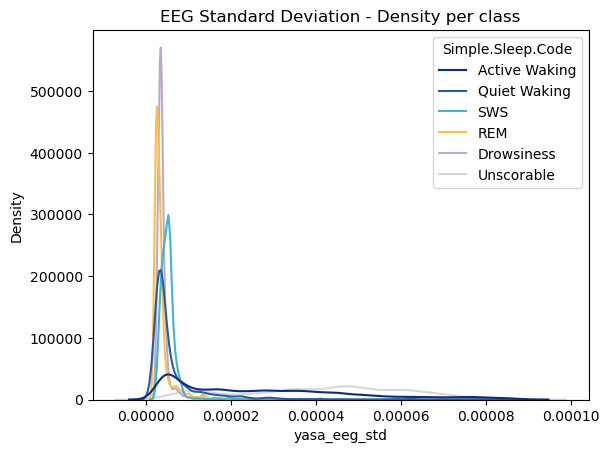

In [8]:
ax = viz.plot_feature_density(features_df, 'yasa_eeg_std', 'Simple.Sleep.Code',
                              'EEG Standard Deviation - Density per class',
                              filter_val=0.05)

➥ EEG Standard Deviation is low for all sleep states, but it is on average much higher during Active Waking and Unscorable (this is mostly due to artifacts of movement attributing to a much noisier EEG)

#### EEG Kurtosis

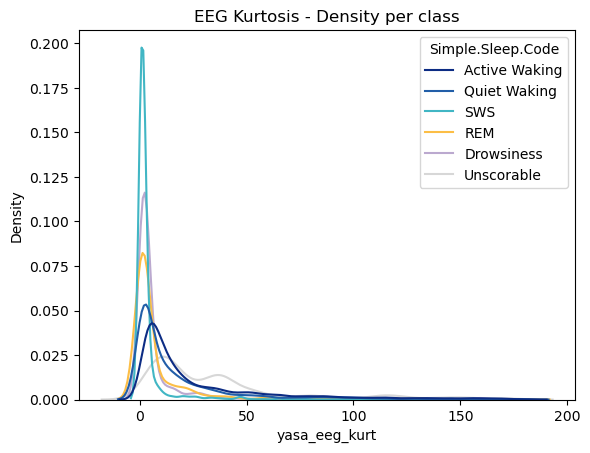

In [9]:
ax = viz.plot_feature_density(features_df, 'yasa_eeg_kurt', 'Simple.Sleep.Code',
                              'EEG Kurtosis - Density per class',
                              filter_val=0.05)

➥ Similar to EEG Standard Deviation, EEG Kurtosis is on average low for all sleep states, but is higher during Active Waking and Unscorable

## Plot ECG Features 

#### Heart Rate mean

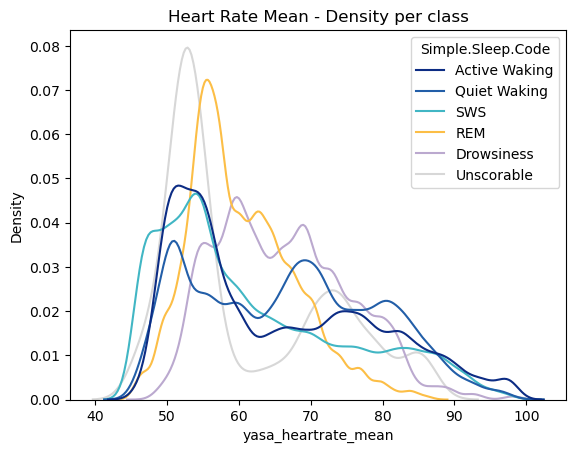

In [10]:
ax = viz.plot_feature_density(features_df, 'yasa_heartrate_mean', 'Simple.Sleep.Code',
                              'Heart Rate Mean - Density per class',
                              filter_val=0.01)

➥ Heart Rate has a right skew, with REM having the overall lowest values, in part because breathing stops during REM and in part because heart rate overall decreases

#### Heart Rate Low Frequency (lf) Power

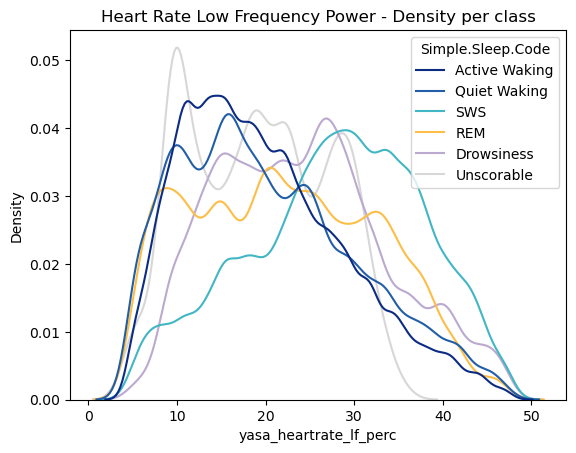

In [11]:
ax = viz.plot_feature_density(features_df, 'yasa_heartrate_lf_perc', 'Simple.Sleep.Code',
                              'Heart Rate Low Frequency Power - Density per class',
                              filter_val=0.01)

➥ Heart Rate LF Power percentage is highest during SWS (which helps separate it from REM)

#### Heart Rate Very Low Frequency (vlf) Power

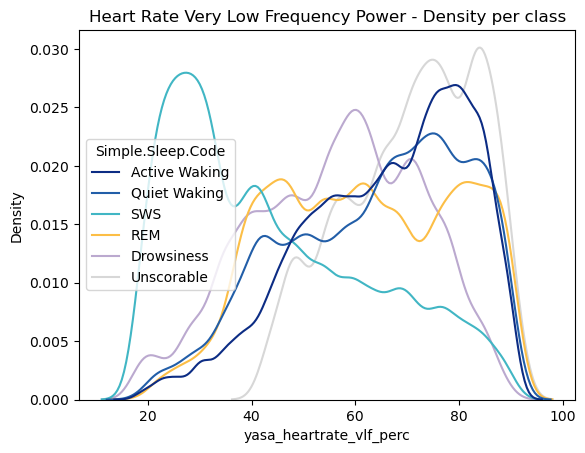

In [12]:
ax = viz.plot_feature_density(features_df, 'yasa_heartrate_vlf_perc', 'Simple.Sleep.Code',
                              'Heart Rate Very Low Frequency Power - Density per class',
                              filter_val=0.01)

➥ Heart Rate VLF Power is lowest during SWS (which helps separate it from REM)

## Movement features

#### GyrZ 

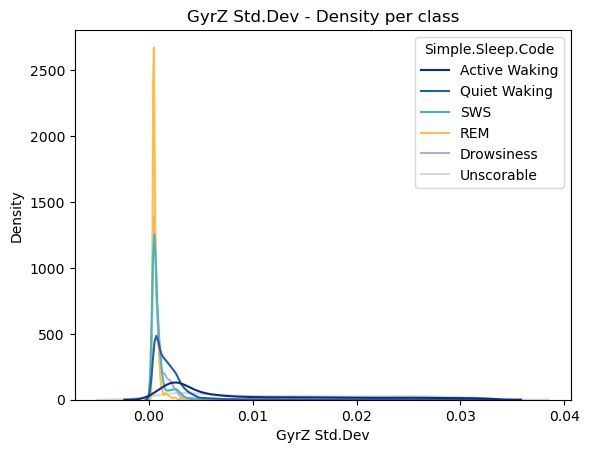

In [13]:
ax = viz.plot_feature_density(features_df, 'GyrZ Std.Dev', 'Simple.Sleep.Code',
                              'GyrZ Std.Dev - Density per class',
                              filter_val=0.05)

➥ GyrZ is a measurement of position, so the standard deviation of GyrZ is a good measurement of movement; during Active and Quiet Waking these values are much higher than during sleep

#### ODBA

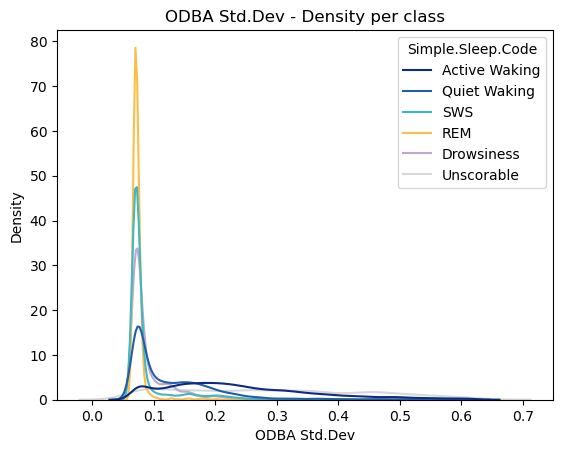

In [14]:
ax = viz.plot_feature_density(features_df, 'ODBA Std.Dev', 'Simple.Sleep.Code',
                              'ODBA Std.Dev - Density per class',
                              filter_val=0.05)

➥ ODBA is a measurement of overall dynamic body acceleration, so the standard deviation of ODBA (and to some extent the average value over the epoch) is a good measurement of movement, similar to GyrZ Std.Dev; during Active and Quiet Waking these values are much higher than during sleep

#### Pressure

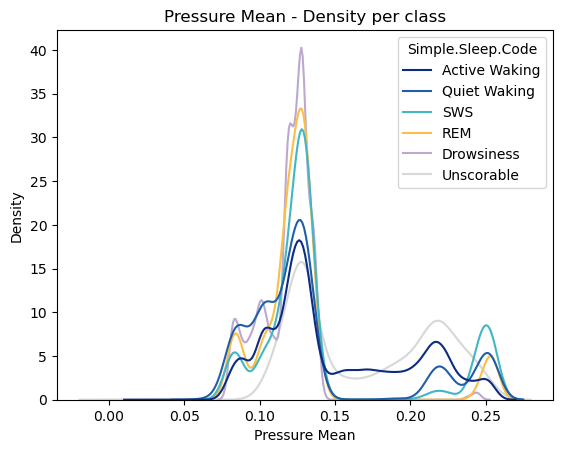

In [15]:
ax = viz.plot_feature_density(features_df, 'Pressure Mean', 'Simple.Sleep.Code',
                              'Pressure Mean - Density per class',
                              filter_val=0.01)

➥ While underwater (the values above 0.15), Wednesday never experiences drowsiness, this only occurs while on land

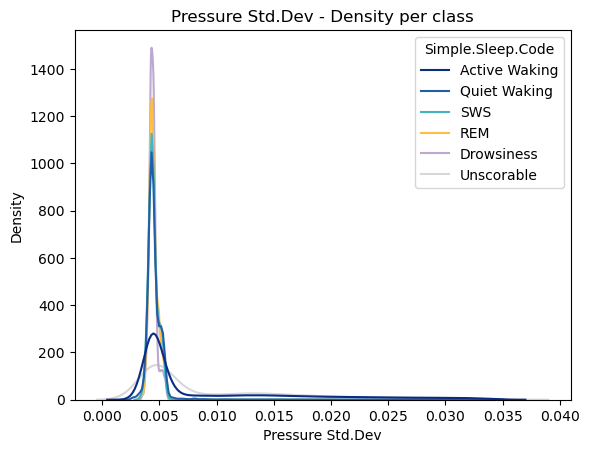

In [16]:
ax = viz.plot_feature_density(features_df, 'Pressure Std.Dev', 'Simple.Sleep.Code',
                              'Pressure Std.Dev - Density per class',
                              filter_val=0.01)

➥ Pressure Std.Dev is only ever not 0 in this case when during Active Waking (because Wednesday is in a enclosure with a pool, there is not a chance for any diving naps)